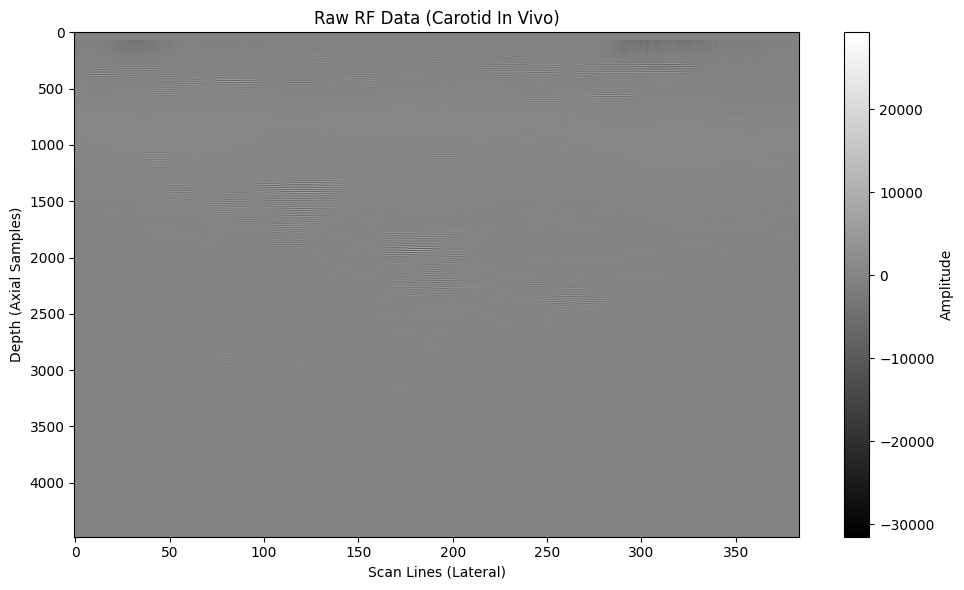

In [1]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np


# Load the .mat file
mat = scipy.io.loadmat('exp/datasets/carotid/rf.mat')
rf = mat['rf']

# Plot the raw RF data
plt.figure(figsize=(10, 6))
plt.imshow(rf, aspect='auto', cmap='gray')
plt.colorbar(label='Amplitude')
plt.title('Raw RF Data (Carotid In Vivo)')
plt.xlabel('Scan Lines (Lateral)')
plt.ylabel('Depth (Axial Samples)')
plt.tight_layout()
plt.show()


In [2]:
rf.shape

(4480, 384)

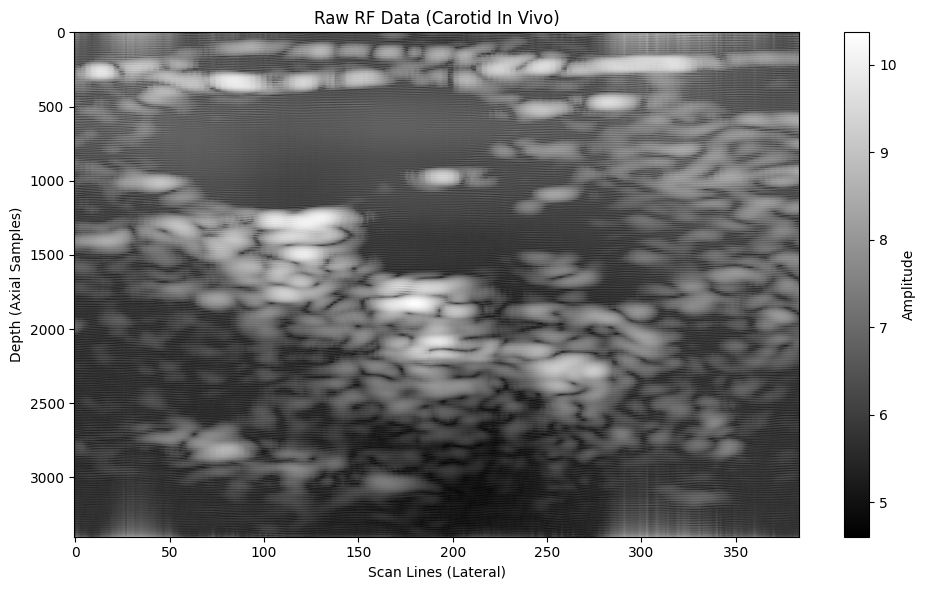

In [4]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from scipy.signal import hilbert
from skimage.transform import resize


# Crop out the non-informative top and bottom regions
rf_cropped = rf[100:3500, :]

# Confirm new shape
new_shape = rf_cropped.shape

# Apply Hilbert transform and log compression for visualization
env_cropped = np.abs(hilbert(rf_cropped, axis=0))
log_env_cropped = np.log(env_cropped + 100)

# Plot the raw RF data
plt.figure(figsize=(10, 6))
plt.imshow(log_env_cropped, aspect='auto', cmap='gray')
plt.colorbar(label='Amplitude')
plt.title('Raw RF Data (Carotid In Vivo)')
plt.xlabel('Scan Lines (Lateral)')
plt.ylabel('Depth (Axial Samples)')
plt.tight_layout()
plt.show()


Cropped RF shape: (2900, 384)


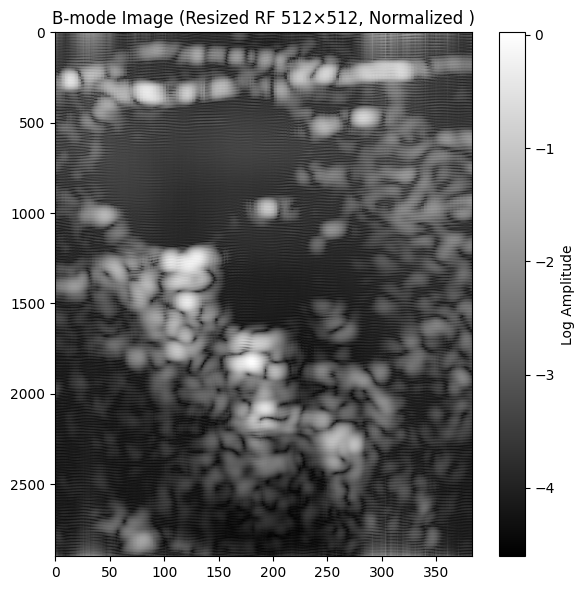

In [16]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from scipy.signal import hilbert
from skimage.transform import resize

# ──────────────────────────────────────────────────────────────
# 1. Load RF Data
# ──────────────────────────────────────────────────────────────
mat = scipy.io.loadmat('exp/datasets/carotid/rf.mat')  # replace with your path
rf = mat['rf']

# ──────────────────────────────────────────────────────────────
# 2. Crop Non-informative Depth (Top and Bottom)
# ──────────────────────────────────────────────────────────────
rf_cropped = rf[100:3000, :]  # crop rows only
print("Cropped RF shape:", rf_cropped.shape)




# Normalize RF
rfn = rf_cropped / np.max(np.abs(rf_cropped))

# ──────────────────────────────────────────────────────────────
# 5. Envelope Detection and B-mode Log Compression
# ──────────────────────────────────────────────────────────────
env = np.abs(hilbert(rfn, axis=0))
log_env = np.log(env + 0.01)  # log compression baseline

# ──────────────────────────────────────────────────────────────
# 6. Display Resulting B-mode Image
# ──────────────────────────────────────────────────────────────
plt.figure(figsize=(6, 6))
plt.imshow(log_env, cmap='gray', aspect='auto')
plt.title('B-mode Image (Resized RF 512×512, Normalized )')
plt.colorbar(label='Log Amplitude')
plt.axis('on')
plt.tight_layout()
plt.show()


Cropped RF shape before downsample: (2900, 384)


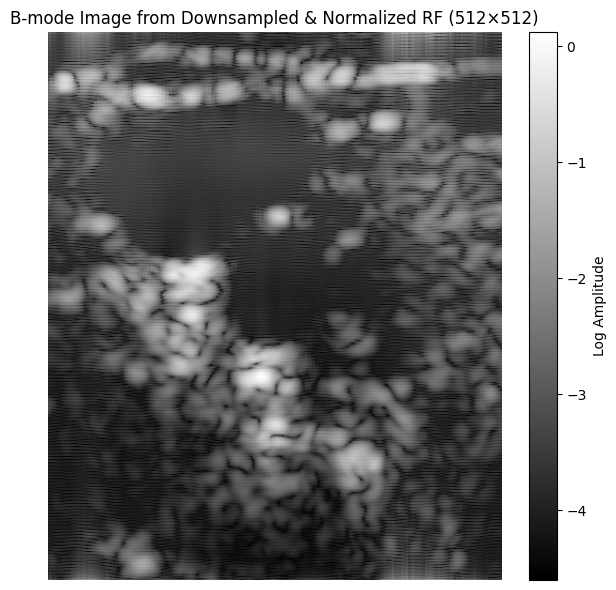

(512, 512)

In [41]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from scipy.signal import hilbert
from skimage.transform import resize

# ──────────────────────────────────────────────────────────────
# 1. Load RF Data
# ──────────────────────────────────────────────────────────────
mat = scipy.io.loadmat('exp/datasets/carotid/rf.mat')  # replace with your path
rf = mat['rf']

# ──────────────────────────────────────────────────────────────
# 2. Crop Non-informative Depth (Top and Bottom)
# ──────────────────────────────────────────────────────────────
rf_cropped = rf[100:3000, :]  # crop rows only
print("Cropped RF shape before downsample:", rf_cropped.shape)

# Step 1: Downsample RF data to 512x512 shape (first height, then width)
row_indices = np.linspace(0, rf_cropped.shape[0] - 1, 512).astype(int)
rf_downsampled = rf_cropped[row_indices, :]  # Downsample rows

# Resize columns from 384 to 512
rf_downsampled_resized = resize(rf_downsampled, (512, 512), mode='reflect', anti_aliasing=False)

# Step 2: Normalize the downsampled RF data to range [-1, 1]
rfn = rf_downsampled_resized / np.max(np.abs(rf_downsampled_resized))

# Step 3: Envelope detection and log compression
env = np.abs(hilbert(rfn, axis=0))
log_env = np.log(env + 0.01)

# Step 4: Display B-mode image
plt.figure(figsize=(6, 6))
plt.imshow(log_env, cmap='gray', aspect='auto')
plt.title('B-mode Image from Downsampled & Normalized RF (512×512)')
plt.colorbar(label='Log Amplitude')
plt.axis('off')
plt.tight_layout()
plt.show()

# Output final RF shape
rfn.shape


In [18]:
import numpy as np
import scipy.io



# SAVE AS 2D array under the key 'data'
scipy.io.savemat(
    "exp/datasets/carotid/rf512.mat",
    {"data": rf_downsampled_resized}
)



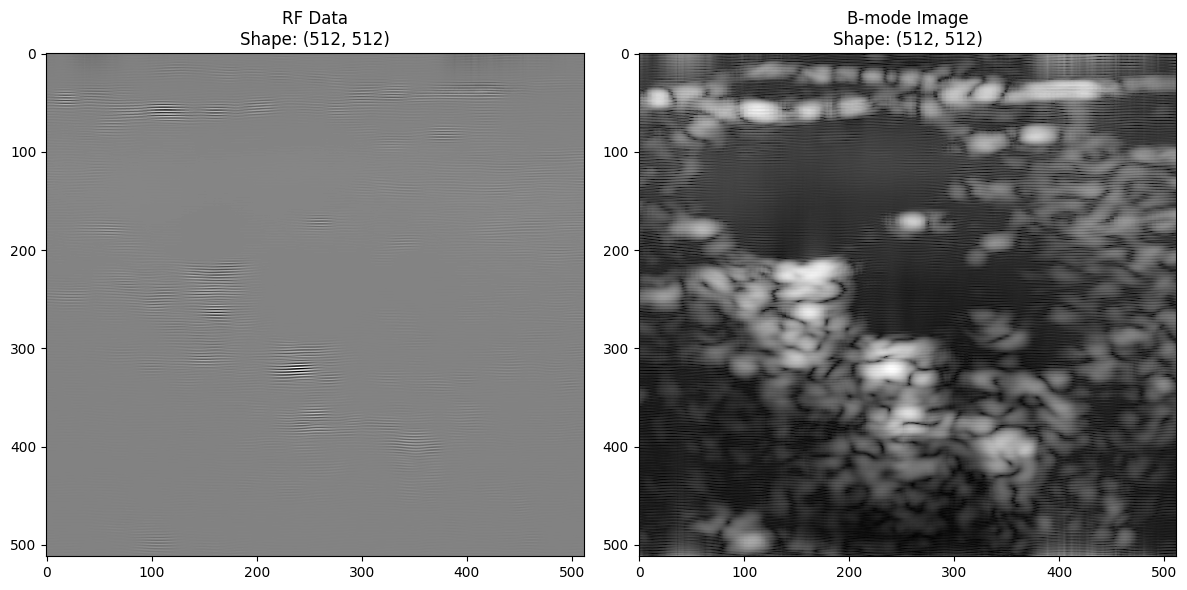

In [19]:
# Load the newly uploaded rf512.mat
mat_loaded = scipy.io.loadmat('exp/datasets/carotid/rf512.mat')
rf_loaded = mat_loaded['data']

# Envelope detection for B-mode
rfn_loaded = rf_loaded / np.max(np.abs(rf_loaded))
env_loaded = np.abs(hilbert(rfn_loaded, axis=0))
log_env_loaded = np.log(env_loaded + 0.01)

# Plot RF and B-mode images side-by-side
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].imshow(rf_loaded, aspect='auto', cmap='gray')
axs[0].set_title(f'RF Data\nShape: {rf_loaded.shape}')
axs[0].axis('on')

axs[1].imshow(log_env_loaded, aspect='auto', cmap='gray')
axs[1].set_title(f'B-mode Image\nShape: {log_env_loaded.shape}')
axs[1].axis('on')

plt.tight_layout()
plt.show()


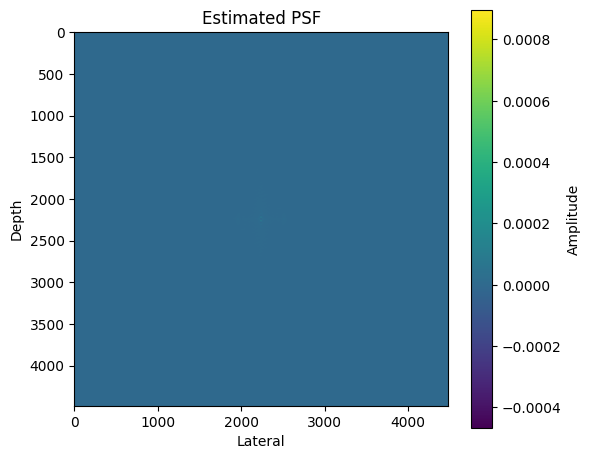

In [20]:
mat = scipy.io.loadmat("exp/datasets/carotid/psf.mat")
rf = mat['psf']  # Should be (512, 512)
# Plot the estimated PSF
plt.figure(figsize=(6, 5))
plt.imshow(rf, cmap='viridis')
plt.colorbar(label='Amplitude')
plt.title('Estimated PSF')
plt.xlabel('Lateral')
plt.ylabel('Depth')
plt.tight_layout()
plt.show()

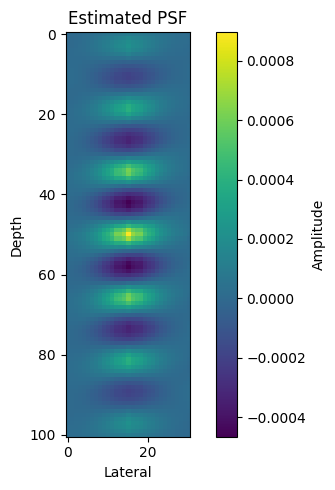

In [21]:
mat = scipy.io.loadmat("exp/datasets/carotid/PSF_crop_1.mat")
rf = mat['cropped_psf']  # Should be (512, 512)
# Plot the estimated PSF
plt.figure(figsize=(6, 5))
plt.imshow(rf, cmap='viridis')
plt.colorbar(label='Amplitude')
plt.title('Estimated PSF')
plt.xlabel('Lateral')
plt.ylabel('Depth')
plt.tight_layout()
plt.show()

In [24]:
import numpy as np
import scipy.io
import pywt

# Load the RF data
mat = scipy.io.loadmat('exp/datasets/carotid/rf512.mat')
rf = mat['data'].astype(np.float64)

# Perform a 2D wavelet decomposition at the finest scale (level=1)
wavelet = 'db1'  # Daubechies 1 wavelet (Haar)
coeffs = pywt.wavedec2(rf, wavelet, level=1)

# Extract detail coefficients: horizontal, vertical, and diagonal
cH, cV, cD = coeffs[1]

# Flatten and concatenate all detail coefficients
detail_coeffs = np.concatenate([cH.ravel(), cV.ravel(), cD.ravel()])

# Median Absolute Deviation (MAD)-based noise estimation
median_val = np.median(np.abs(detail_coeffs))
sigma_est = median_val / 0.6745

# Convert estimated noise to decibels
sigma_db = 20 * np.log10(sigma_est)

sigma_est, sigma_db

# Print the result in a formatted string
print(f"Estimated noise standard deviation (σ): {sigma_est:.2f}")
print(f"Estimated noise level in decibels (dB): {sigma_db:.2f} dB")


Estimated noise standard deviation (σ): 73.91
Estimated noise level in decibels (dB): 37.37 dB


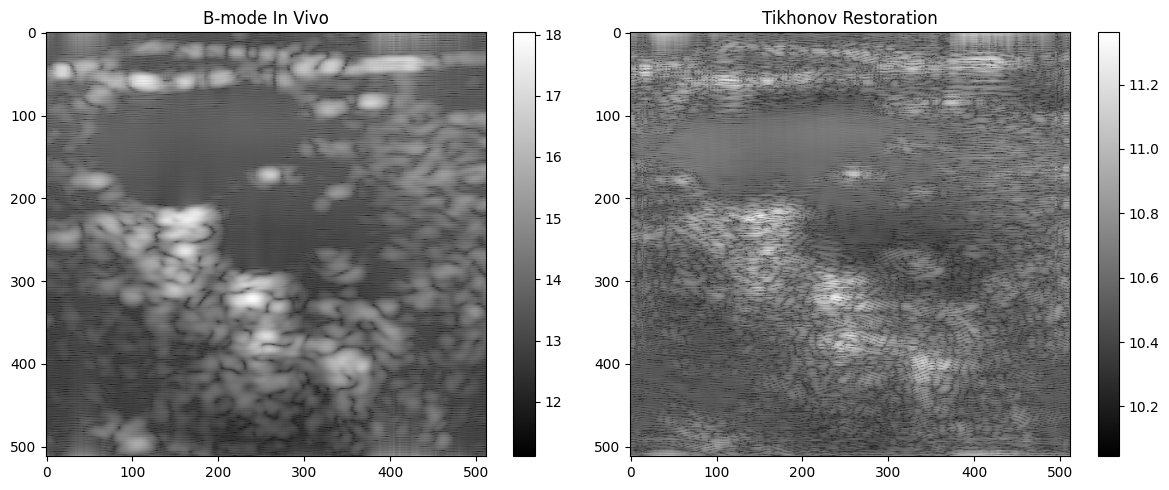

In [32]:
import numpy as np
import scipy.io
from scipy.signal import hilbert
import matplotlib.pyplot as plt

# Load the RF data and the estimated PSF
rf_data = scipy.io.loadmat('exp/datasets/carotid/rf512.mat')['data'].astype(np.float64)
psf_data = scipy.io.loadmat('exp/datasets/carotid/PSF_carotid.mat')['cropped_psf'].astype(np.float64)

# Normalize RF
rfn = rf_data / np.max(np.abs(rf_data))

# Normalize PSF
H = psf_data / np.sum(np.abs(psf_data))

# Create the D matrix (BCCB form in Fourier domain)
Mh, Nh = H.shape
Mrf, Nrf = rf_data.shape
center = [Mh // 2, Nh // 2]

# Pad PSF to the size of RF and shift the center
pad_height = Mrf - Mh
pad_width = Nrf - Nh
H_padded = np.pad(H, ((0, pad_height), (0, pad_width)), mode='constant')
H_shifted = np.roll(H_padded, shift=(1 - center[0], 1 - center[1]), axis=(0, 1))

# FFT of the padded and shifted PSF
D = np.fft.fft2(H_shifted)

# Tikhonov restoration (Wiener filtering)
SNR = 2000  # corresponds to ~xx dB
R = np.fft.fft2(rfn)
VivoTK = np.fft.ifft2(R * np.conj(D) / (1/SNR + np.conj(D)*D)).real

# B-mode display: In Vivo
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(np.abs(hilbert(rf_data, axis=0))**0.2 + 10, cmap='gray', aspect='auto')
plt.title('B-mode In Vivo')
plt.axis('on')
plt.colorbar()

# B-mode display: Tikhonov Restoration
plt.subplot(1, 2, 2)
plt.imshow(np.abs(VivoTK)**0.2 + 10, cmap='gray', aspect='auto')
plt.title('Tikhonov Restoration')
plt.axis('on')
plt.colorbar()

plt.tight_layout()
plt.show()


In [42]:
# Save the Tikhonov restored RF image into a .mat file with key 'VivoTK'
save_path_tikhonov = 'exp/datasets/carotid/VivoTK_carotid.mat'
scipy.io.savemat(save_path_tikhonov, {'VivoTK': VivoTK})




In [29]:
folder_name = "Carotid_final"

In [30]:
!python main.py --ni --config deblur_carotid.yml --doc imagenet_ood --timesteps 20 --eta 0.85 --etaB 1 --deg deblur_bccb --sigma_0 100 -i {folder_name}

Module path: /projects/minds/PDAS-M2-2025/DDPM
Current sys.path: ['/projects/minds/PDAS-M2-2025/Stable_DDRM', '/usr/lib/python310.zip', '/usr/lib/python3.10', '/usr/lib/python3.10/lib-dynload', '/home/pdas/.local/lib/python3.10/site-packages', '/usr/local/lib/python3.10/dist-packages', '/usr/local/lib/python3.10/dist-packages/nvfuser-0.1.4a0+d0bb811-py3.10-linux-x86_64.egg', '/usr/lib/python3/dist-packages', '/projects/minds/PDAS-M2-2025/DDPM']
File not found: /projects/minds/PDAS-M2-2025/DDPM/denoising_diffusion_pytorch.py
Import failed: No module named 'denoising_diffusion_pytorch'
INFO - main.py - 2025-06-13 16:43:26,934 - Using device: cuda
INFO - main.py - 2025-06-13 16:43:26,935 - Writing log file to exp/logs/imagenet_ood
INFO - main.py - 2025-06-13 16:43:26,935 - Exp instance id = 2905939
INFO - main.py - 2025-06-13 16:43:26,935 - Exp comment = 
building dataset from exp/carotid.txt
read meta done
Start from 0
  0%|                                                     | 0/1 [00:0

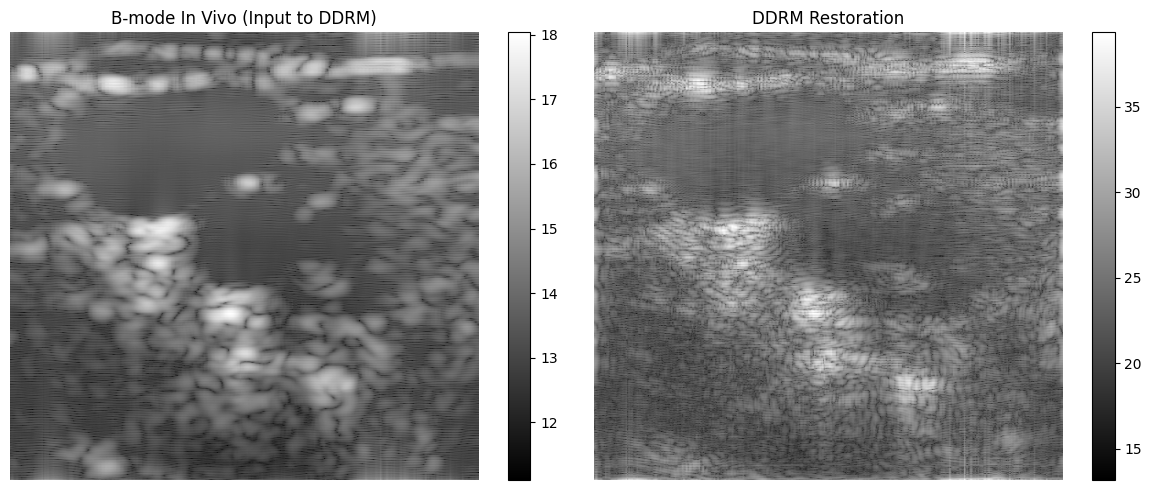

In [34]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert

# ─────────────── Load and Process RF Data ───────────────
data = scipy.io.loadmat('exp/datasets/carotid/rf512.mat')
rf = data['data'].astype(np.float64)

# Compute log-compressed B-mode for RF
bmode_rf = np.abs(hilbert(rf, axis=0))**0.2 + 10

# ─────────────── Load and Process DDRM Result ───────────────
mat_res = scipy.io.loadmat('exp/image_samples/Carotid_final/0_-1.mat')
img_res = mat_res['image']
if img_res.ndim == 3 and img_res.shape[0] in (1, 3):
    img_res = np.transpose(img_res, (1, 2, 0))
grayimage = np.mean(img_res, axis=2) if img_res.ndim == 3 else img_res

# Compute B-mode for DDRM output
bmode_ddrm = np.abs(hilbert(grayimage, axis=0))**0.2 + 10

# ─────────────── Plot Comparison ───────────────
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(bmode_rf, cmap='gray', aspect='auto')
plt.title('B-mode In Vivo (Input to DDRM)')
plt.axis('off')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(bmode_ddrm, cmap='gray', aspect='auto')
plt.title('DDRM Restoration')
plt.axis('off')
plt.colorbar()

plt.tight_layout()
plt.show()


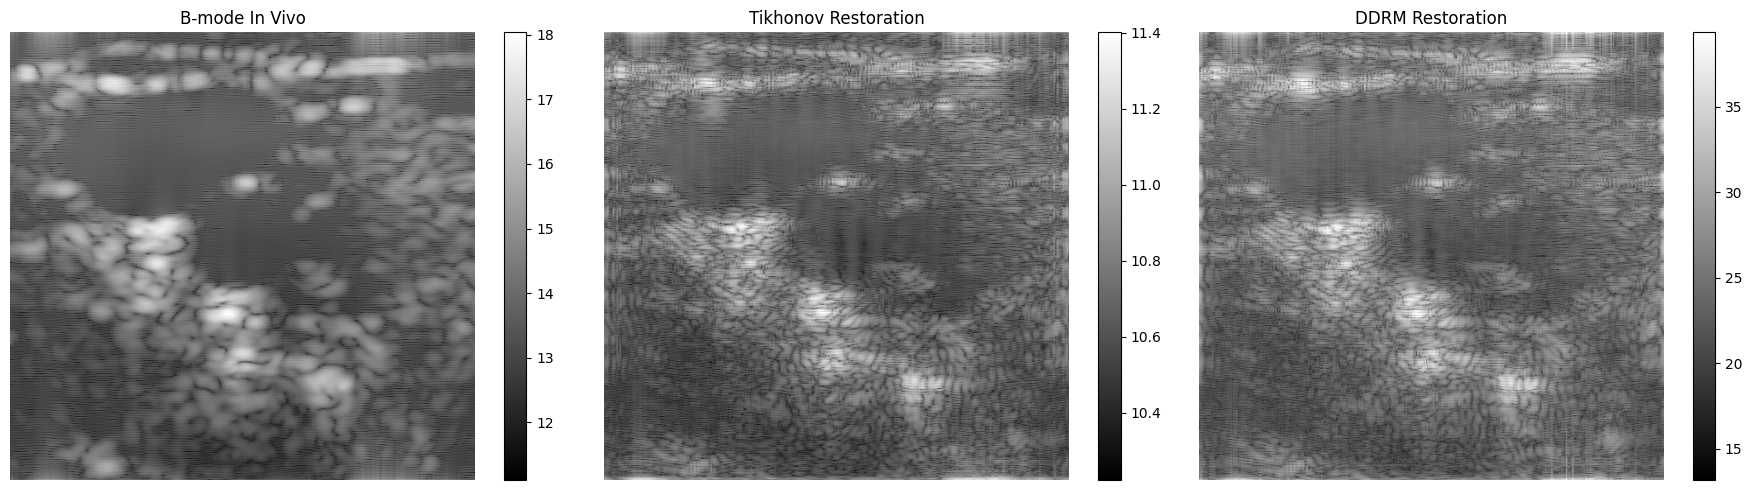

In [36]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert

# ─────────────── Load and Process RF Data ───────────────
rf = scipy.io.loadmat('exp/datasets/carotid/rf512.mat')['data'].astype(np.float64)
bmode_rf = np.abs(hilbert(rf, axis=0))**0.2 + 10

# ─────────────── Load and Process Tikhonov Result ───────────────
VivoTK = scipy.io.loadmat('exp/datasets/carotid/VivoTK_carotid.mat')['VivoTK'].astype(np.float64)
bmode_tikhonov = np.abs(hilbert(VivoTK, axis=0))**0.2 + 10

# ─────────────── Load and Process DDRM Result ───────────────
mat_res = scipy.io.loadmat('exp/image_samples/Carotid_final/0_-1.mat')['image']
if mat_res.ndim == 3:
    mat_res = np.transpose(mat_res, (1, 2, 0))  # (C,H,W) → (H,W,C)
gray_ddrm = np.mean(mat_res, axis=2) if mat_res.ndim == 3 else mat_res
bmode_ddrm = np.abs(hilbert(gray_ddrm, axis=0))**0.2 + 10

# ─────────────── Plot Comparison ───────────────
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.imshow(bmode_rf, cmap='gray', aspect='auto')
plt.title('B-mode In Vivo')
plt.axis('off')
plt.colorbar()

plt.subplot(1, 3, 2)
plt.imshow(bmode_tikhonov, cmap='gray', aspect='auto')
plt.title('Tikhonov Restoration')
plt.axis('off')
plt.colorbar()

plt.subplot(1, 3, 3)
plt.imshow(bmode_ddrm, cmap='gray', aspect='auto')
plt.title('DDRM Restoration')
plt.axis('off')
plt.colorbar()

plt.tight_layout()
plt.show()


In [37]:
import matplotlib.pyplot as plt
import os

# Create output directory
output_dir = 'bmode_outputs'
os.makedirs(output_dir, exist_ok=True)

# Define image list and filenames
bmode_images = [
    (bmode_rf, 'carotid_bmode_original.png', 'B-mode In Vivo'),
    (bmode_tikhonov, 'carotid_bmode_tikhonov.png', 'Tikhonov Restoration'),
    (bmode_ddrm, 'carotid_bmode_ddrm.png', 'DDRM Restoration')
]

# Save each B-mode image individually
for img, filename, title in bmode_images:
    plt.figure(figsize=(6, 6))
    plt.imshow(img, cmap='gray', aspect='auto')
    plt.title(f'{title}\nshape: {img.shape}')
    plt.xlabel('Lateral (pixels)')
    plt.ylabel('Axial (pixels)')
    plt.colorbar(label='Log Envelope')
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, filename), dpi=300, bbox_inches='tight')
    plt.close()

print("✅ B-mode images saved successfully to:", output_dir)


✅ B-mode images saved successfully to: bmode_outputs


In [38]:
import numpy as np
import scipy.io
from scipy.signal import hilbert

# 1) Load raw RF data
rf_orig_mat = scipy.io.loadmat('exp/datasets/carotid/rf512.mat')
rf_tik_mat  = scipy.io.loadmat('exp/datasets/carotid/VivoTK_carotid.mat')
ddrm_mat    = scipy.io.loadmat('exp/image_samples/Carotid_final/0_-1.mat')

rf_orig = rf_orig_mat['data'].astype(np.float64)
rf_tik  = rf_tik_mat['VivoTK'].astype(np.float64)

# DDRM RF may have extra channel dimension
ddrm_img = ddrm_mat['image']
if ddrm_img.ndim == 3:
    rf_ddrm = np.transpose(ddrm_img, (1, 2, 0)).mean(axis=2)
else:
    rf_ddrm = ddrm_img.astype(np.float64)

# 2) Compute analytic envelope (magnitude)
env_orig = np.abs(hilbert(rf_orig, axis=0))
env_tik  = np.abs(hilbert(rf_tik,  axis=0))
env_ddrm = np.abs(hilbert(rf_ddrm, axis=0))

# 3) Crop to common size (≤ 512×299)
rows = min(env_orig.shape[0], env_tik.shape[0], env_ddrm.shape[0], 512)
cols = min(env_orig.shape[1], env_tik.shape[1], env_ddrm.shape[1], 299)
env_orig = env_orig[:rows, :cols]
env_tik  = env_tik[:rows, :cols]
env_ddrm = env_ddrm[:rows, :cols]

# 4) FWHM along axial profile
def fwhm_profile(profile):
    # Normalize to [0,1]
    p = (profile - profile.min()) / (profile.max() - profile.min() + 1e-12)
    idx = np.where(p >= 0.5)[0]
    return (idx[-1] - idx[0]) if idx.size > 1 else np.nan

# 5) Resolution gain via average FWHM over top-K scatterers
def resolution_gain_fwhm(env_dict, top_k=5):
    # Identify top-k columns by summed envelope energy in Original
    energies = env_dict['Original'].sum(axis=0)
    top_cols = np.argsort(energies)[-top_k:]
    # Compute mean FWHM for each method
    fwhm_vals = {
        name: np.nanmean([fwhm_profile(img[:, c]) for c in top_cols])
        for name, img in env_dict.items()
    }
    # Gain = FWHM_original / FWHM_method
    return {name: fwhm_vals['Original'] / val for name, val in fwhm_vals.items()}

# 6) Calculate and print resolution gains
envs = {'Original': env_orig, 'Tikhonov': env_tik, 'DDRM': env_ddrm}
res_gains = resolution_gain_fwhm(envs, top_k=5)

print("Axial Resolution Gain (×):")
for method, gain in res_gains.items():
    print(f"  {method}: {gain:.2f}×")


Axial Resolution Gain (×):
  Original: 1.00×
  Tikhonov: 0.98×
  DDRM: 1.01×


In [40]:
import numpy as np
import scipy.io
from scipy.signal import hilbert
from scipy.ndimage import uniform_filter, label
import pandas as pd

# ---------- 1. Load RF data and compute envelope ----------
rf_orig_mat = scipy.io.loadmat('exp/datasets/carotid/rf512.mat')
rf_tik_mat  = scipy.io.loadmat('exp/datasets/carotid/VivoTK_carotid.mat')
ddrm_mat    = scipy.io.loadmat('exp/image_samples/Carotid_final/0_-1.mat')

rf_orig = rf_orig_mat['data'].astype(np.float64)
rf_tik  = rf_tik_mat['VivoTK'].astype(np.float64)
ddrm_img = ddrm_mat['image']
if ddrm_img.ndim == 3:
    rf_ddrm = np.transpose(ddrm_img, (1, 2, 0)).mean(axis=2)
else:
    rf_ddrm = ddrm_img.astype(np.float64)

env_orig = np.abs(hilbert(rf_orig, axis=0))
env_tik  = np.abs(hilbert(rf_tik,  axis=0))
env_ddrm = np.abs(hilbert(rf_ddrm, axis=0))

# ---------- 2. Crop to common size ----------
rows = min(env_orig.shape[0], env_tik.shape[0], env_ddrm.shape[0], 512)
cols = min(env_orig.shape[1], env_tik.shape[1], env_ddrm.shape[1], 299)
env_orig = env_orig[:rows, :cols]
env_tik  = env_tik[:rows, :cols]
env_ddrm = env_ddrm[:rows, :cols]

# ---------- 3. Automatic homogeneous-region detection ----------
def detect_homogeneous_region(env_img, window=15, var_percentile=20):
    # Local variance map
    local_mean = uniform_filter(env_img, size=window)
    local_var = uniform_filter(env_img**2, size=window) - local_mean**2
    
    # Threshold at a low-variance percentile
    threshold = np.percentile(local_var, var_percentile)
    mask_low_var = local_var <= threshold
    
    # Keep the largest connected region
    labeled, n = label(mask_low_var)
    if n == 0:
        return mask_low_var
    counts = np.bincount(labeled.ravel())[1:]
    largest_label = counts.argmax() + 1
    return labeled == largest_label

# Detect ROIs
roi_orig = detect_homogeneous_region(env_orig)
roi_tik  = detect_homogeneous_region(env_tik)
roi_ddrm = detect_homogeneous_region(env_ddrm)

# ---------- 4. Compute speckle SNR within detected ROI ----------
def speckle_snr_in_roi(env_img, roi_mask):
    patch = env_img[roi_mask]
    mu = patch.mean()
    var = patch.var()
    snr_linear = mu**2 / (var + 1e-12)
    return 10 * np.log10(snr_linear + 1e-12)

results = []
for name, env_img, roi in [
    ('Original', env_orig, roi_orig),
    ('Tikhonov', env_tik, roi_tik),
    ('DDRM', env_ddrm, roi_ddrm)
]:
    snr_val = speckle_snr_in_roi(env_img, roi)
    results.append([name, snr_val, int(roi.sum())])


# Display results
df = pd.DataFrame(results, columns=['Method', 'Speckle SNR (dB)', 'ROI Size (px)']).set_index('Method')
from IPython.display import display
display(df)



,Speckle SNR (dB),ROI Size (px)
Method,,
Original,12.932384,13353
Tikhonov,6.143386,17026
DDRM,5.976023,15473


In [39]:
import numpy as np
import cv2
import pandas as pd

# ---------- 1. Load the grayscale B-mode PNGs ----------
img_orig = cv2.imread('bmode_outputs/carotid_bmode_original.png', cv2.IMREAD_GRAYSCALE).astype(np.float64)
img_tik  = cv2.imread('bmode_outputs/carotid_bmode_tikhonov.png', cv2.IMREAD_GRAYSCALE).astype(np.float64)
img_ddrm = cv2.imread('bmode_outputs/carotid_bmode_ddrm.png', cv2.IMREAD_GRAYSCALE).astype(np.float64)

# ---------- 2. Crop to common shape ----------
common_rows = min(img_orig.shape[0], img_tik.shape[0], img_ddrm.shape[0])
common_cols = min(img_orig.shape[1], img_tik.shape[1], img_ddrm.shape[1])

img_orig_cropped = img_orig[:common_rows, :common_cols]
img_tik_cropped  = img_tik[:common_rows, :common_cols]
img_ddrm_cropped = img_ddrm[:common_rows, :common_cols]

# ---------- 3. ROI helper ----------
def define_dynamic_roi(shape, y_start_pct, y_end_pct, x_start_pct, x_end_pct):
    rows, cols = shape
    y1 = int(rows * y_start_pct)
    y2 = int(rows * y_end_pct)
    x1 = int(cols * x_start_pct)
    x2 = int(cols * x_end_pct)
    roi = np.zeros(shape, dtype=bool)
    roi[y1:y2, x1:x2] = True
    return roi

# ---------- 4. Define Signal and Background ROIs ----------
roi_signal = define_dynamic_roi((common_rows, common_cols), 0.55, 0.63, 0.3, 0.4)
roi_bg     = define_dynamic_roi((common_rows, common_cols), 0.2, 0.3, 0.05, 0.12)

# ---------- 5. Metric Functions ----------
def compute_cnr(img, sig_mask, bg_mask):
    mu_sig = img[sig_mask].mean()
    mu_bg  = img[bg_mask].mean()
    var_sig = img[sig_mask].var()
    var_bg  = img[bg_mask].var()
    cnr = np.abs(mu_sig - mu_bg) / np.sqrt(var_sig + var_bg + 1e-12)
    return 20 * np.log10(cnr + 1e-12)

def compute_cr(img, sig_mask, bg_mask):
    mu_sig = img[sig_mask].mean()
    mu_bg  = img[bg_mask].mean()
    cr = mu_sig / (mu_bg + 1e-12)
    return 20 * np.log10(cr + 1e-12)

# ---------- 6. Compute CNR and CR ----------
methods_cropped = {
    'Tikhonov': img_tik_cropped,
    'DDRM': img_ddrm_cropped
}

results = {}
for name, img in methods_cropped.items():
    cnr = compute_cnr(img, roi_signal, roi_bg)
    cr = compute_cr(img, roi_signal, roi_bg)
    results[name] = [cnr, cr]

# ---------- 7. Display as DataFrame ----------
df_finetuned = pd.DataFrame(results, index=['CNR (dB)', 'CR (dB)']).T
print(df_finetuned)


          CNR (dB)   CR (dB)
Tikhonov  3.347803 -5.509463
DDRM      2.974148 -4.906181
